In [ ]:
import numpy as np                                                              #подгружаем модули
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline


In [ ]:
# загружаем базу данных
df = pd.read_excel('/content/drive/MyDrive/_Проекты/Пальмовое масло/data/Tseny_2010-20.xlsx')         # Если запускает Конюшок Илья
df = pd.read_excel('/content/drive/MyDrive/Базы/Пальмовое масло цены/Tseny_2010-20 (1).xlsx')         # Если запускает Николай Лисин

df.head(5)
df1 = df.drop([0])                                                              #удалим нулевую строку
df1 = df1[:-2]                                                                  #удалим нижние две строки
df1.rename(columns=lambda x: df1.iloc[0][x], inplace=True)                      #переименуем колонки
df1.drop([1],inplace=True)                                                      #удалить строку дубликат
df1.reset_index(drop=True)                                                      #переустановить индексы
df1.head(3)

,дата,"Soybean oil, Brazil, fob","Soybean oil, Argentina, fob","Sunoil, EU, fob N.W.Eur. ports","Sunoil, Arg., fob","Sunoil, Ukraine, fob","Rape oil, Dutch, fob ex-mill","Palm olein RBD, Mal., fob","Palmkernel oil, Mal., cif Rot.","Coconut oil, Phil., cif Rot.","Пальмовое масло RBD, FOB Малайзия , usd/тн"
2,2010-01-04 00:00:00,896,891,990,NaN,NaN,942,822,900,835,795
3,2010-01-05 00:00:00,895,890,1000,910,NaN,945,830,900,830,805
4,2010-01-06 00:00:00,891,887,1005,915,NaN,943,830,900,825,805


## Обработка датасета

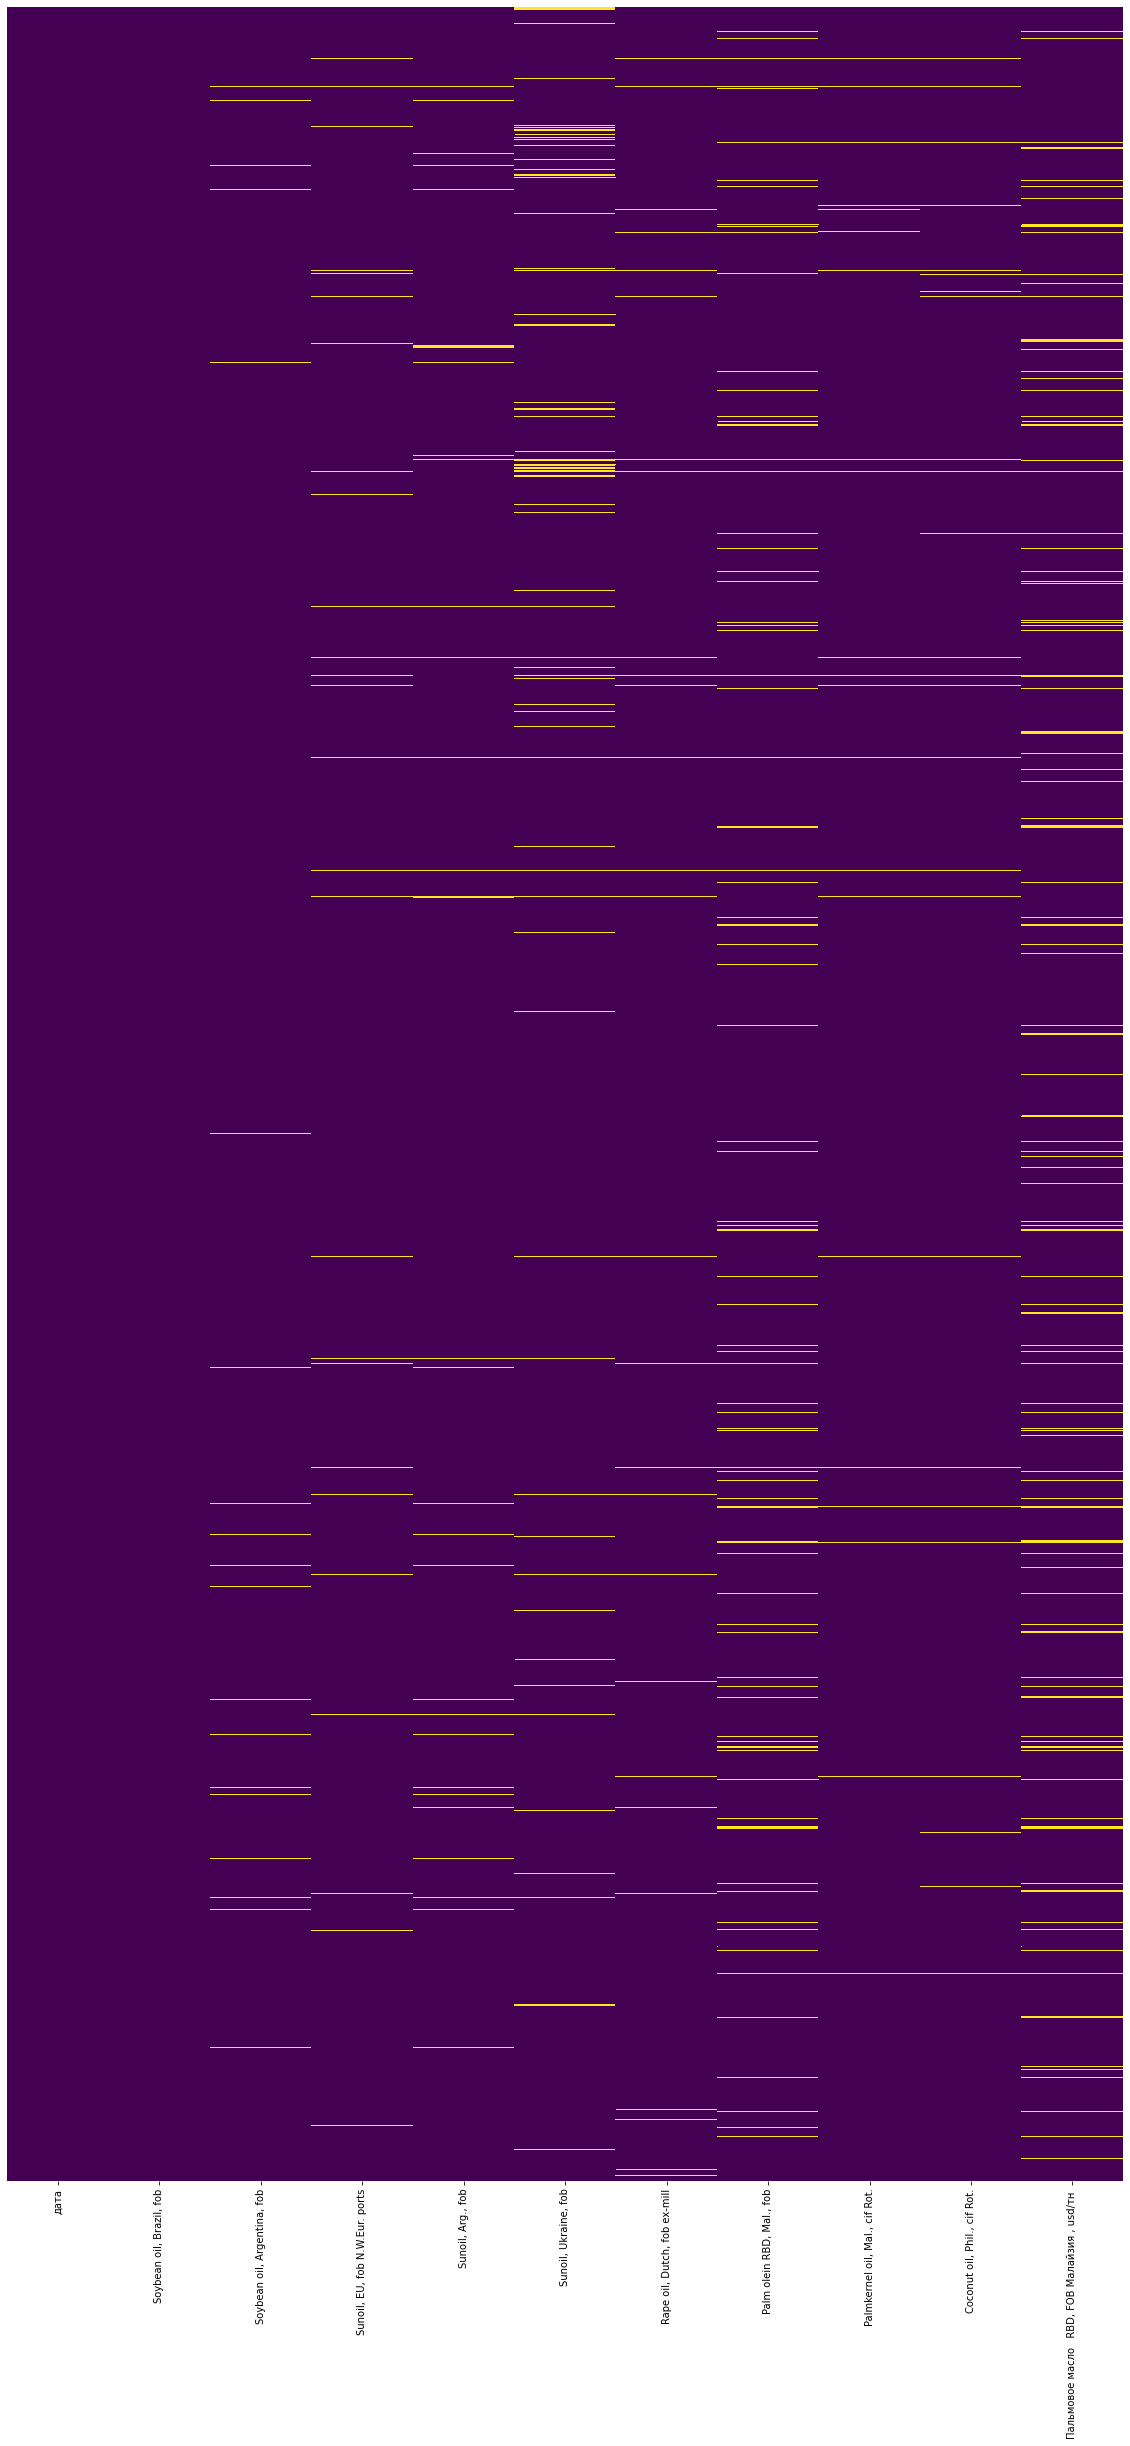

In [ ]:
fig, ax = plt.subplots(figsize=(20,40)) # Создаем область под график
sns_heatmap = sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем пропуски
plt.show() # Отображаем график

In [ ]:
df1 = df1.fillna(method='ffill') """ # или стоило удалить?  """
#fig, ax = plt.subplots(figsize=(20,40)) # Создаем область под график
#sns_heatmap = sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем пропуски
#plt.show() # Отображаем график

In [ ]:
df1['дата'] = pd.to_datetime(df1['дата'])                                       #преобразуем столбец 'дата' в тип данных datetime
df1.at[2, 'Sunoil, Arg., fob'] = round(df1['Sunoil, Arg., fob'].mean(),1)       #Заменяем NaNиты на средние в ряду значения
df1.at[2, 'Sunoil, Ukraine, fob'] = round(df1['Sunoil, Ukraine, fob'].mean(),1)
df1.at[3, 'Sunoil, Ukraine, fob'] = round(df1['Sunoil, Ukraine, fob'].mean(),1)
df1.at[4, 'Sunoil, Ukraine, fob'] = round(df1['Sunoil, Ukraine, fob'].mean(),1)
df1.at[5, 'Sunoil, Ukraine, fob'] = round(df1['Sunoil, Ukraine, fob'].mean(),1)
df1.head(3)

,дата,"Soybean oil, Brazil, fob","Soybean oil, Argentina, fob","Sunoil, EU, fob N.W.Eur. ports","Sunoil, Arg., fob","Sunoil, Ukraine, fob","Rape oil, Dutch, fob ex-mill","Palm olein RBD, Mal., fob","Palmkernel oil, Mal., cif Rot.","Coconut oil, Phil., cif Rot.","Пальмовое масло RBD, FOB Малайзия , usd/тн"
2,2010-01-04,896,891,990,899.5,893.9,942,822,900,835,795.0
3,2010-01-05,895,890,1000,910.0,893.9,945,830,900,830,805.0
4,2010-01-06,891,887,1005,915.0,893.9,943,830,900,825,805.0


In [ ]:
df1.rename(columns={'дата': 'date'}, inplace=True)                              #Переименуем колонку 'дата'в 'date'
df1.index = df1['date']                                                         #Преобразуем индексы в даты. Теперь вместо индексов стоят даты
df1.drop(df1.columns[[0]], axis='columns', inplace=True)                        #Удалим старый столбец 'date' . Часто нажимать нельзя, иначе всю таблицу удалит
#Сдвинуть на 30 назад
df1['Пальмовое масло   RBD, FOB Малайзия , usd/тн '] = df1['Пальмовое масло   RBD, FOB Малайзия , usd/тн '].shift(-30)
df1 = df1[:-30]                                                                  #Удалим последние 30 строк так как там NaNиты
df1 

,"Soybean oil, Brazil, fob","Soybean oil, Argentina, fob","Sunoil, EU, fob N.W.Eur. ports","Sunoil, Arg., fob","Sunoil, Ukraine, fob","Rape oil, Dutch, fob ex-mill","Palm olein RBD, Mal., fob","Palmkernel oil, Mal., cif Rot.","Coconut oil, Phil., cif Rot.","Пальмовое масло RBD, FOB Малайзия , usd/тн"
date,,,,,,,,,,
2010-01-04,896,891,990,899.5,893.9,942,822,900,835,775.0
2010-01-05,895,890,1000,910.0,893.9,945,830,900,830,775.0
2010-01-06,891,887,1005,915.0,893.9,943,830,900,825,797.5
2010-01-07,878,873,995,905.0,893.9,940,820,895,810,787.5
2010-01-08,870,865,985,900.0,905.0,928,818,890,805,785.0
...,...,...,...,...,...,...,...,...,...,...
2020-10-20,922,831,990,985.0,975.0,927,758,795,1110,882.5
2020-10-21,919,838,1010,990.0,990.0,930,770,810,1100,932.5
2020-10-22,930,850,1020,1000.0,990.0,932,778,820,1125,920.0


# Анализ взаимосвязи БУДУЩЕЙ цены и остальных факторов


----
Видно, что, как минимум два фактора периодически выиваются из общей динамики движенияцен


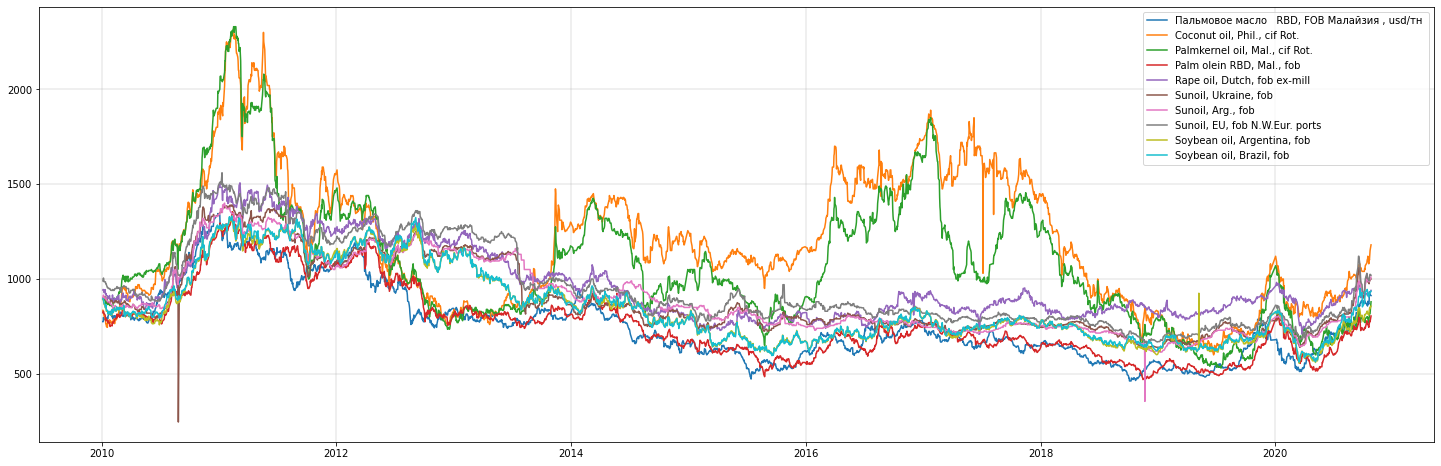

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(25,8))                      #создаем полотно графика
axes.plot(df1.index, df1['Пальмовое масло   RBD, FOB Малайзия , usd/тн '], label=df1.columns[9])
axes.plot(df1.index, df1['Coconut oil, Phil., cif Rot.'], label=df1.columns[8])
axes.plot(df1.index, df1['Palmkernel oil, Mal., cif Rot.'], label=df1.columns[7])
axes.plot(df1.index, df1['Palm olein RBD, Mal., fob'], label=df1.columns[6])
axes.plot(df1.index, df1['Rape oil, Dutch, fob ex-mill'], label=df1.columns[5])
axes.plot(df1.index, df1['Sunoil, Ukraine, fob'], label=df1.columns[4])
axes.plot(df1.index, df1['Sunoil, Arg., fob'], label=df1.columns[3])
axes.plot(df1.index, df1['Sunoil, EU, fob N.W.Eur. ports'], label=df1.columns[2])
axes.plot(df1.index, df1['Soybean oil, Argentina, fob'], label = df1.columns[1])
axes.plot(df1.index, df1['Soybean oil, Brazil, fob'], label=df1.columns[0])
axes.legend()
plt.grid(linewidth=0.4)
plt.show()

## Анализ скользящей корреляцией
----
1. Взаимосвязь факторов с ценой на пальмовое масло не постоянна на длительных периодах (в 2-3 года)
2. Уменьшив период анализо до 1-23х месяцев видим, наблдаем сильнейшиеизменения в корреляции факторов с ценой.

**Проблема:** пока мы будем обучать сеть на одной комбинации факторов, при использовании в продакшн их комбинация изменится и обученная модель устареет

**Вывод:** необходио найти способ использовать факторы, имеющие сильную корреляцию с ценой на пальмовое масло, но при этом исключать те, которые перестали влиять, или, наоборот, изменили влияние на отрицательное.

In [ ]:
#monthChange = df1.pct_change()
monthChange = df1

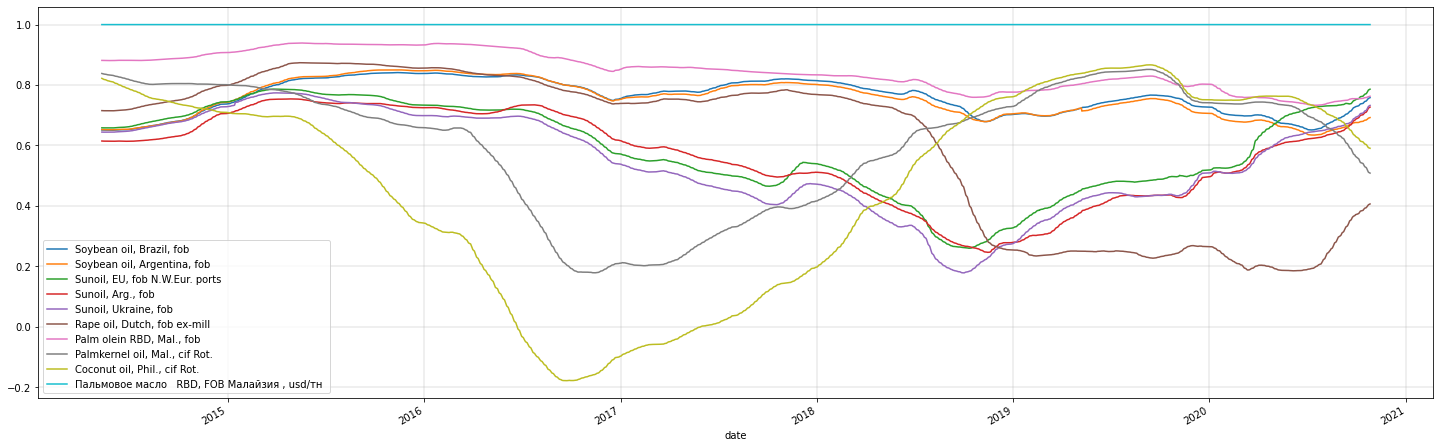

In [ ]:
period = 360*3
rollCorr = monthChange.rolling(window=period).corr(monthChange['Пальмовое масло   RBD, FOB Малайзия , usd/тн '])
# Строю график
rollCorr.plot(figsize=(25, 8))
plt.grid(linewidth=0.4)
plt.show()

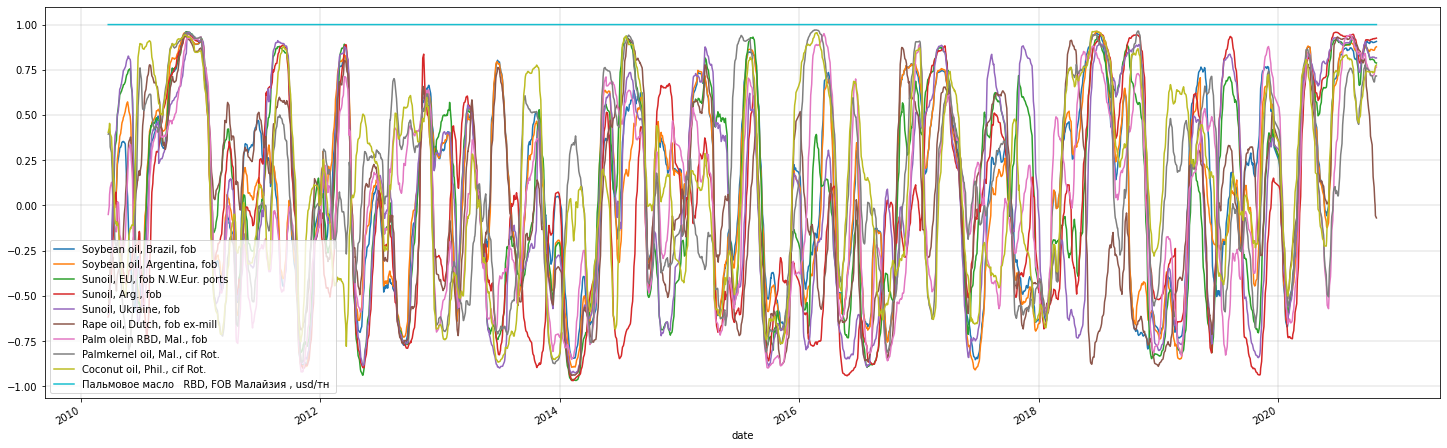

In [ ]:
period = 60
rollCorr = monthChange.rolling(window=period).corr(monthChange['Пальмовое масло   RBD, FOB Малайзия , usd/тн '])
# Строю график
rollCorr.plot(figsize=(25, 8))
plt.grid(linewidth=0.4)
plt.show()

## Анализ STD
---
Ряд факторов "живет своей жизнью" - лишний повод с осторожностью обучать модель "на всех имеющихся исторических данных"


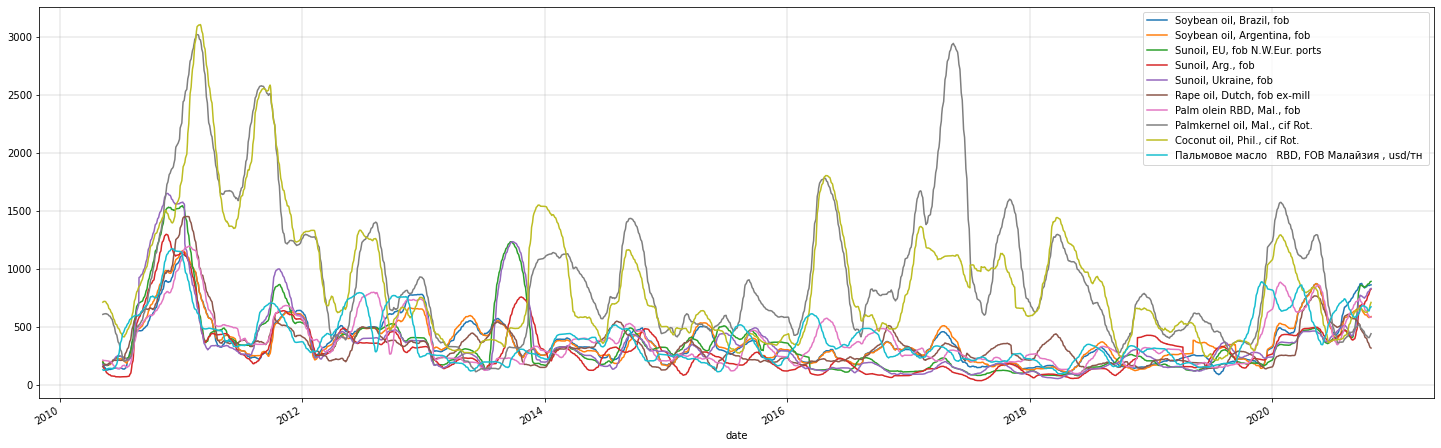

In [ ]:
period = 90                                                                     # Определяю рассматриваемый период
                                                                                # Вычисляю волатильность колебаний за месяц
vol = monthChange.rolling(period).std() * np.sqrt(period)
# Строю график
vol.plot(figsize=(25, 8))
plt.grid(linewidth=0.4)
plt.show()

## Теплограммы 
---
еще одна проверка гипотезы об изменении влияния факторов на искомую цен

Интервал в 2 месяца

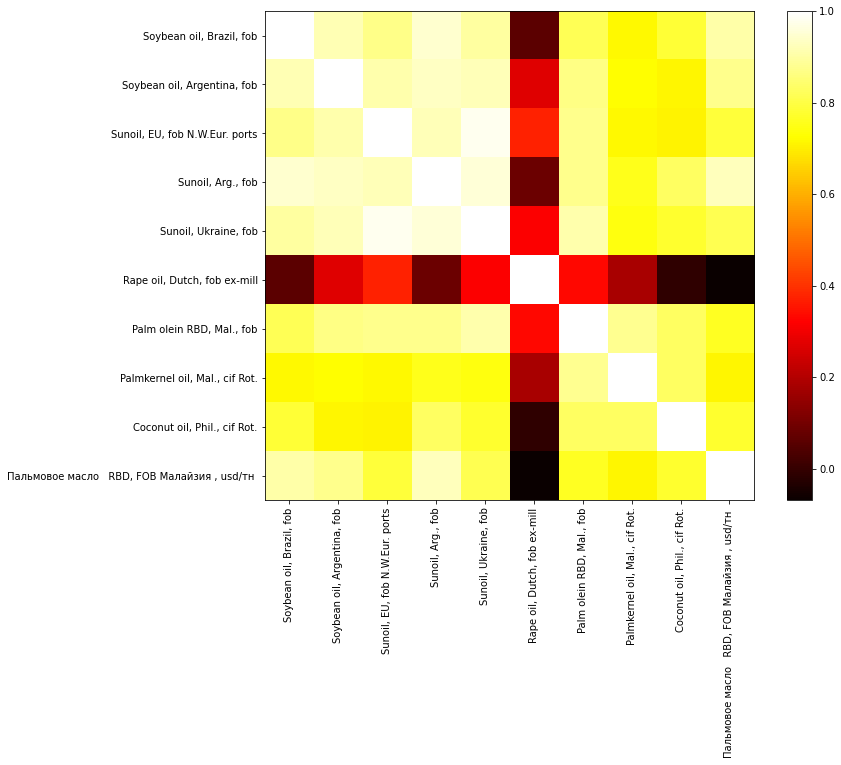

In [ ]:
xxx = monthChange[-60:]
corrs = xxx.corr()
# строим теплокарту корреляционной матрицы
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns , rotation=90)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(12,9)

Обучать на интервале 1 год (360 дней) не имеет смысла, тк корреляция факторов с ценой менее 50% (лучше уж монетку подбросить)

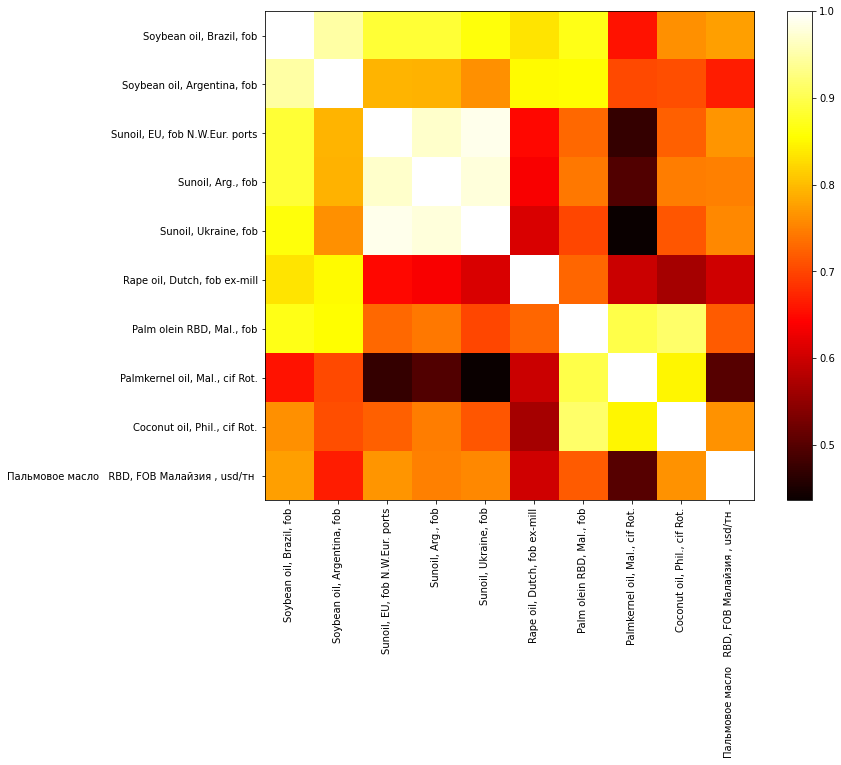

In [ ]:
xxx = monthChange[-360:]
corrs = xxx.corr()
# строим теплокарту корреляционной матрицы
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns , rotation=90)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(12,9)

## Возможное решение проблемы обучения на изменяемых факторах
---
это:
1. удаление из обучающей выборки "слабых" факторов
2. подбор оптимального временного интервала

In [ ]:
correlations = np.abs(df1.corrwith(df1['Пальмовое масло   RBD, FOB Малайзия , usd/тн ']))
print(correlations.sort_values(ascending=True))
"""
lim = 0.6 # удалим те факторы, влияние которых слабее 0.6
for i in range(len(correlations)):
    if correlations[i] <= lim:
        print('Удален: ', correlations[i], ' \t', correlations.index[i])
        del df1[correlations.index[i]]

print(df1.shape)
data[:3]

Coconut oil, Phil., cif Rot.                     0.519043
Palmkernel oil, Mal., cif Rot.                   0.674752
Sunoil, Arg., fob                                0.854962
Sunoil, Ukraine, fob                             0.857016
Rape oil, Dutch, fob ex-mill                     0.864449
Sunoil, EU, fob N.W.Eur. ports                   0.869170
Soybean oil, Argentina, fob                      0.875860
Soybean oil, Brazil, fob                         0.881398
Palm olein RBD, Mal., fob                        0.941436
Пальмовое масло   RBD, FOB Малайзия , usd/тн     1.000000
dtype: float64


# Сохранение датасетов для нейронки


In [ ]:
#
file_name1 = 'dataframe_1.csv'
df1.to_csv(file_name1)

In [ ]:
df1.shape

(2652, 10)

In [ ]:
#
monthChange = df1.pct_change()
file_name2 = 'dataframe_pct_change.csv'
monthChange.to_csv(file_name2)

In [ ]:
# Сохранение Y
df1.drop(df1.columns[[0,1,2,3,4,5,6,7,8]], axis='columns', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
file_name3 = 'dataframe_Y.csv'
df1.to_csv(file_name3)
df1

,"Пальмовое масло RBD, FOB Малайзия , usd/тн"
date,
2010-01-04,775.0
2010-01-05,775.0
2010-01-06,797.5
2010-01-07,787.5
2010-01-08,785.0
...,...
2020-10-20,882.5
2020-10-21,932.5
2020-10-22,920.0
